## CS 175: Topics in Computational Science - Probabilities, Distributions, and Stochastics
Professor: Roy Vincent L. Canseco, MSEE

Ray Justin O. Huang | SN: 2012 62256 | Date: January 25, 2017 | rayjustinhuang@gmail.com

# Balls Without Replacement Exercise
This is an assignment meant to show how probabilities of certain empirical phenomena converge at their analytically derivable values as the number of trials increases.

### BALL PICKING ENGINE
Given a number of balls and a number of red, white, and black balls, generates a tuple of drawn balls
of the format (reds, whites, blacks)

In [9]:
from numpy import random

def BallPicker(take=3, red=7, white=5, black=8):
    SetofBalls = [0,0,0]
    for run in range(take):
        TotalBalls = red + white + black
        seed = random.randint(1,TotalBalls+1)
        if seed > red + white:
            SetofBalls[2] += 1
            black -= 1
        elif seed > red:
            SetofBalls[1] += 1
            white -= 1
        else:
            SetofBalls[0] += 1
            red -= 1
    return tuple(SetofBalls)

In [19]:
%%timeit -n 1000000
def BallPicker(take=3, red=7, white=5, black=8):
    SetofBalls = [0,0,0]
    for run in range(take):
        TotalBalls = red + white + black
        seed = random.randint(1,TotalBalls+1)
        if seed > red + white:
            SetofBalls[2] += 1
            black -= 1
        elif seed > red:
            SetofBalls[1] += 1
            white -= 1
        else:
            SetofBalls[0] += 1
            red -= 1
    return tuple(SetofBalls)

# print(BallPicker())

1000000 loops, best of 3: 102 ns per loop


In [11]:
%%timeit -n 1000000
def BallPicker(take=3, red=7, white=5, black=8):
    R, W, B = 0, 0, 0
    for run in range(take):
        TotalBalls = red + white + black
        seed = random.randint(1,TotalBalls+1)
        if seed > red + white:
            B += 1
            black -= 1
        elif seed > red:
            W += 1
            white -= 1
        else:
            R += 1
            red -= 1
    return (R,W,B)

# print(BallPicker())

1000000 loops, best of 3: 102 ns per loop


### Scenario 1: ONE OF EACH
Given a number of runs, returns the probability that the resulting draw turned out to have one of each colored ball. Assumes 3 balls are taken from the bag per draw.

In [15]:
%%timeit -n 1000000
def OneOfEach(runs):
    DesiredOutcomes = 0
    for i in range(runs):
        result = BallPicker()
        if result == (1,1,1):
            DesiredOutcomes += 1
    return DesiredOutcomes/runs

1000000 loops, best of 3: 62.5 ns per loop


#### Analytical Solution for Scenario 1
Analytically, one can derive the solution for scenario 1 by using the following calculation, which relies on the hypergeometric distribution:

\begin{align}
P(R=1,W=1,B=1)=\frac{{7 \choose 1}{5 \choose 1}{8 \choose 1}}{20 \choose 3}=\frac{14}{57}\approx 24.57\%
\end{align}

### Scenario 2: AT LEAST ONE RED
Given a number of runs, returns the probability that the resulting draw turned out to have at least one red ball. Assumes 3 balls are taken from the bag per draw.

In [20]:
%%timeit -n 1000000
def AtLeastOneRed(runs):
    DesiredOutcomes = 0
    for i in range(runs):
        result = BallPicker()
        if result[0] >= 1:
            DesiredOutcomes += 1
    return DesiredOutcomes/runs

1000000 loops, best of 3: 59.8 ns per loop


#### Analytical Solution for Scenario 2
Analytically, one can derive the solution for scenario 2 by using the following calculation, which also relies on the hypergeometric distribution:

\begin{align}
P(R\geq1)=1-\frac{{7 \choose 0}{13 \choose 3}}{20 \choose 3}=\frac{427}{570}\approx 74.91\%
\end{align}

### Plotting
Prepares the necessary axes and other parameters for plotting both bar charts.

Note: The x-axis consists of numbers 10 to 90 in increments of 10, 100 to 900 in increments of 100, 1000 to 9000 in increments of 1000, and 10000, 50000, 100000, 500000, and 1000000.

In [9]:
import matplotlib.pyplot as plt

xaxis = [i*10 for i in range(1,10)] + [i*100 for i in range(1,10)] + [i*1000 for i in range(1,10)] + [10**x for x in range(4,7)] + [5*(10**x) for x in range(4,6)]
xaxis.sort()
xaxislabels = [str(xaxis[i]) for i in range(len(xaxis))]

barwidths = [i for i in range(len(xaxis))]

yaxis1 = [ OneOfEach(xaxis[i]) for i in range(len(xaxis)) ]

yaxis2 = [ AtLeastOneRed(xaxis[i]) for i in range(len(xaxis)) ]

#### Plot 1 (One of Each Ball)
A bar chart containing the probabilities of attaining one of each ball (assuming 3 balls taken per draw) vs. the number of draws.

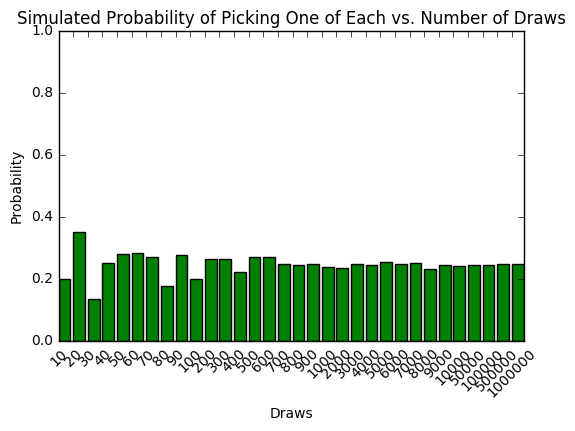

In [10]:
plt.bar(barwidths, yaxis1, color='green')

plt.ylabel("Probability")
plt.xlabel("Draws")
plt.title("Simulated Probability of Picking One of Each vs. Number of Draws")
plt.xticks([i for i in range(len(xaxislabels))], xaxislabels, rotation="45")
plt.autoscale()
x1,x2,y1,y2 = plt.axis()
plt.axis([x1,x2,0,1])
plt.show()

#### Plot 2 (At Least One Red)
Below is a bar chart containing the probabilities of attaining at least one red (assuming 3 balls taken per draw) vs. the number of draws.

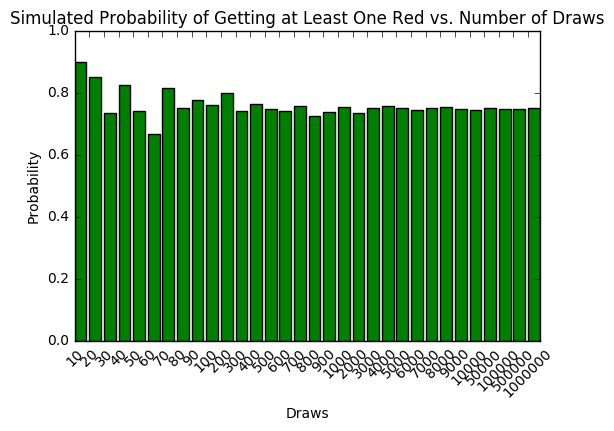

In [11]:
plt.bar(barwidths, yaxis2, color='green')

plt.ylabel("Probability")
plt.xlabel("Draws")
plt.title("Simulated Probability of Getting at Least One Red vs. Number of Draws")
plt.xticks([i for i in range(len(xaxislabels))], xaxislabels, rotation="45")
plt.autoscale()
x1,x2,y1,y2 = plt.axis()
plt.axis([x1,x2,0,1])
plt.show()

### Conclusion
The above plots indeed appear to indicate that the respective probabilities converge to the values one can derive analytically:

For Scenario 1, the answer appears to converge at around 25%, which is close to 24.56% (or 14/57).

For Scenario 2, the answer appears to converge at around 75%, which is close to 74.91% (or 427/570).